In [1]:
from model import Model
from data import MNIST
import torch
import matplotlib.pyplot as plt

model = Model([1,28,28], 1000, 0.0001, 0.02)
dataset = MNIST()

model.load_model("diffusion_model")

Model loaded!


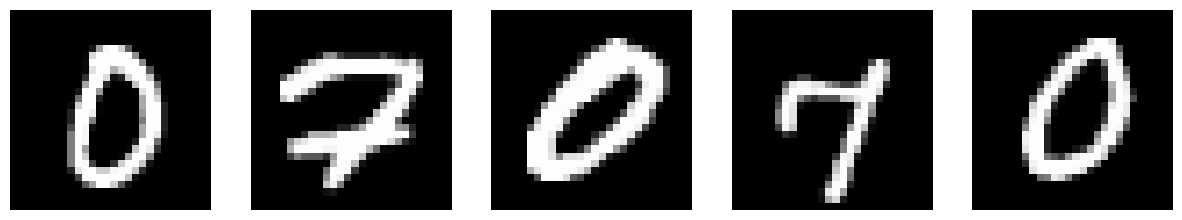

In [2]:
xs = dataset[torch.randint(0, len(dataset), (5,))]
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axs):
    ax.imshow(xs[i].reshape(28, 28), cmap='gray')
    ax.axis('off') 

In [3]:
ts = model.sample_time_steps(5)
noisy_xs, eps = model.make_noisy_image(xs, ts)

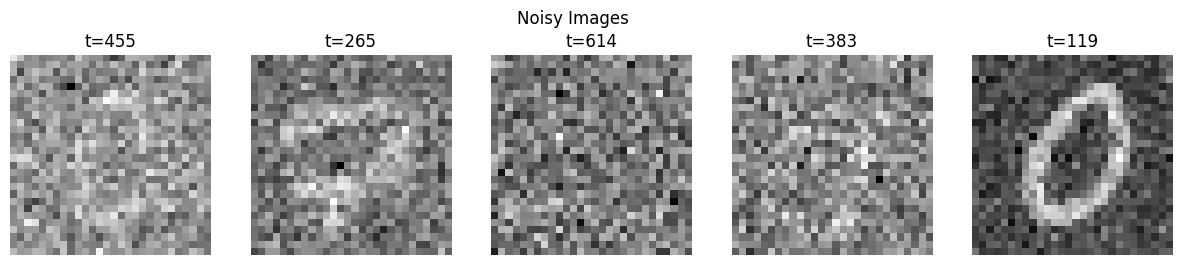

In [4]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
fig.suptitle("Noisy Images")
for i, ax in enumerate(axs):
    ax.imshow(noisy_xs[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"t={ts[i]}")
    ax.axis('off')

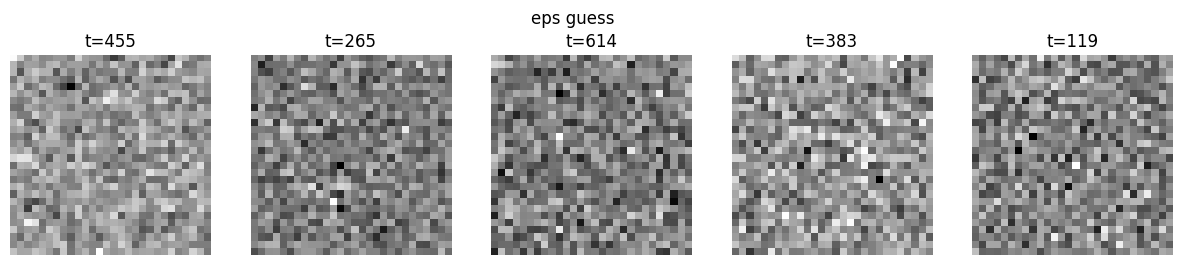

In [5]:
t_enc = model.time_encoding(ts)
eps_guess = model(noisy_xs, t_enc).detach()
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
fig.suptitle("eps guess")
for i, ax in enumerate(axs):
    ax.imshow(eps_guess[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"t={ts[i]}")
    ax.axis('off')


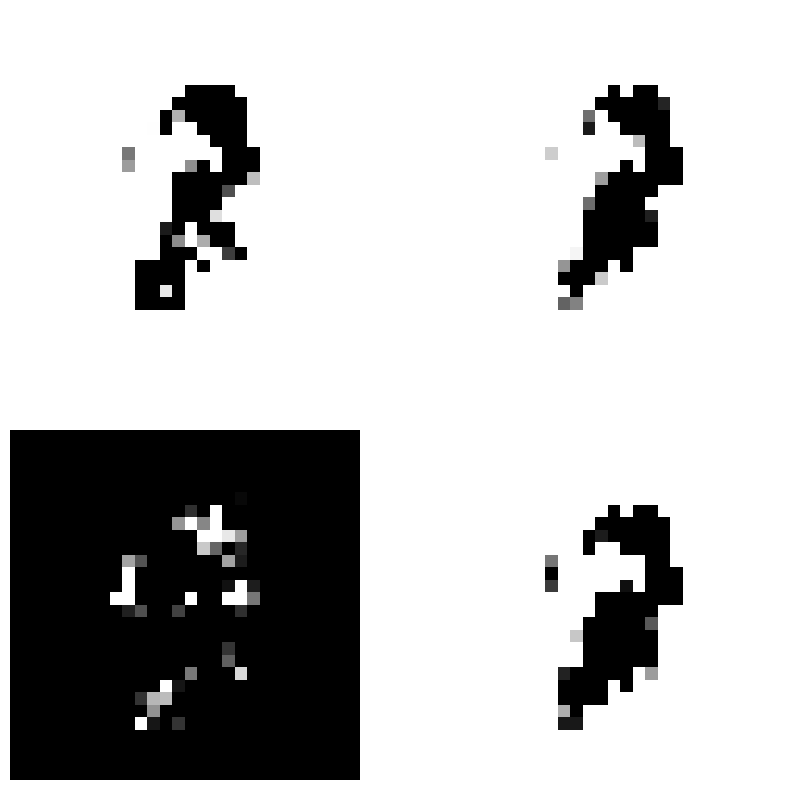

In [6]:
samples = [model.sample_image() for _ in range(4)]
fig, axs = plt.subplots(2,2, figsize=(10, 10))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(samples[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

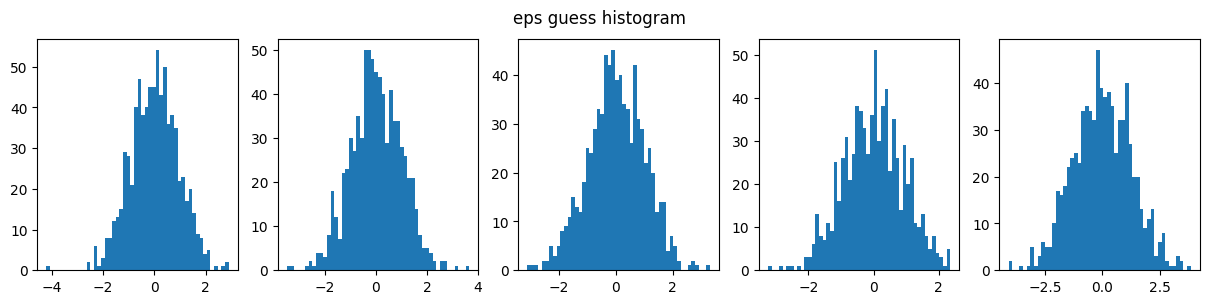

In [8]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
fig.suptitle("eps guess histogram")
for i, ax in enumerate(axs):
    ax.hist(eps_guess[i].flatten(), bins=50)


In [11]:
diff = (eps - eps_guess)**2
print(diff.mean())

tensor(0.1269)


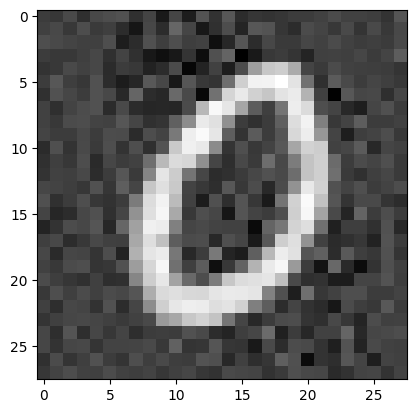

In [17]:
n=4
x0 = (noisy_xs[n] - model.sqrt_one_minus_alpha_hat[ts[n]] * eps_guess[n]) / model.sqrt_alpha_hat[ts[n]]
plt.imshow(x0.reshape(28, 28), cmap='gray')